In [1]:
#python=3.6
#tensorflow=1.15.0
#keras=2.3.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
training_data = np.array(pd.read_csv('data/all_data.csv'))

In [4]:
Xtrain = []
Ytrain = []

k = 21

for i in range(len(training_data)-k-7):
    t1 = training_data[i:i+k, 0:2].flatten()
    t2 = training_data[i+k+1:i+k+7+1, 2:6].flatten()
    Xtrain.append(np.concatenate((t1, t2), axis=0))
    Ytrain.append(training_data[i+k+1:i+k+7+1, 1])
    
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

print(Xtrain.shape)
print(Ytrain.shape)

(642, 70)
(642, 7)


In [5]:
from sklearn.preprocessing import MinMaxScaler

Xsc = MinMaxScaler(feature_range = (0, 1))
Xtrain = Xsc.fit_transform(Xtrain)

Ysc = MinMaxScaler(feature_range = (0, 1))
Ytrain = Ysc.fit_transform(Ytrain)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
model = Sequential()

model.add(Dense(units=64, 
                input_dim=Xtrain.shape[1],
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=64,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=48,
                kernel_initializer='normal',
                activation='relu'))

In [24]:
from keras import backend as K

#def root_mean_squared_error(y_true, y_pred):
#        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Adding the output layer
model.add(Dense(units=7))

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                4544      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 343       
Total params: 12,167
Trainable params: 12,167
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.fit(Xtrain, Ytrain, epochs=4000, batch_size=128)
#model.save('model.h5')

Epoch 1/4000
642/642 [==============================] - 0s 195us/step - loss: 0.2134
Epoch 2/4000
642/642 [==============================] - 0s 26us/step - loss: 0.1145
Epoch 3/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0429
Epoch 4/4000
642/642 [==============================] - 0s 30us/step - loss: 0.0209
Epoch 5/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0184
Epoch 6/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0174
Epoch 7/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0150
Epoch 8/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0139
Epoch 9/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0133
Epoch 10/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0131
Epoch 11/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0125
Epoch 12/4000
642/642 [==============================] - 0s 31us/step - l

642/642 [==============================] - 0s 25us/step - loss: 0.0073
Epoch 98/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0076
Epoch 99/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0076
Epoch 100/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0074
Epoch 101/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0107
Epoch 102/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0080
Epoch 103/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0081
Epoch 104/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0084
Epoch 105/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0078
Epoch 106/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0084
Epoch 107/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0073
Epoch 108/4000
642/642 [==============================] - 0s 22us/step 

642/642 [==============================] - 0s 28us/step - loss: 0.0081
Epoch 193/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0075
Epoch 194/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0070
Epoch 195/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0067
Epoch 196/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0067
Epoch 197/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0067
Epoch 198/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0068
Epoch 199/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0068
Epoch 200/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0067
Epoch 201/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0066
Epoch 202/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0066
Epoch 203/4000
642/642 [==============================] - 0s 25us/ste

642/642 [==============================] - 0s 40us/step - loss: 0.0076
Epoch 288/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0070
Epoch 289/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0067
Epoch 290/4000
642/642 [==============================] - 0s 40us/step - loss: 0.0068
Epoch 291/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0067
Epoch 292/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0063
Epoch 293/4000
642/642 [==============================] - 0s 41us/step - loss: 0.0065
Epoch 294/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0064
Epoch 295/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0066
Epoch 296/4000
642/642 [==============================] - 0s 40us/step - loss: 0.0067
Epoch 297/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0066
Epoch 298/4000
642/642 [==============================] - 0s 27us/ste

642/642 [==============================] - 0s 26us/step - loss: 0.0075
Epoch 382/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0066
Epoch 383/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0067
Epoch 384/4000
642/642 [==============================] - 0s 42us/step - loss: 0.0065
Epoch 385/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0064
Epoch 386/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0065
Epoch 387/4000
642/642 [==============================] - 0s 37us/step - loss: 0.0062
Epoch 388/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 389/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 390/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0065
Epoch 391/4000
642/642 [==============================] - 0s 41us/step - loss: 0.0062
Epoch 392/4000
642/642 [==============================] - 0s 27us/ste

642/642 [==============================] - 0s 23us/step - loss: 0.0063
Epoch 476/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0066
Epoch 477/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0069
Epoch 478/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0066
Epoch 479/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0074
Epoch 480/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0069
Epoch 481/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0069
Epoch 482/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0061
Epoch 483/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0079
Epoch 484/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 485/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 486/4000
642/642 [==============================] - ETA: 0s - l

642/642 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 570/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0056
Epoch 571/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0057
Epoch 572/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0055
Epoch 573/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 574/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0055
Epoch 575/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0054
Epoch 576/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0053
Epoch 577/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0058
Epoch 578/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 579/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0053
Epoch 580/4000
642/642 [==============================] - 0s 23us/ste

642/642 [==============================] - 0s 23us/step - loss: 0.0057
Epoch 665/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0053
Epoch 666/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0050
Epoch 667/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0052
Epoch 668/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0052
Epoch 669/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0052
Epoch 670/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0051
Epoch 671/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0054
Epoch 672/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0051
Epoch 673/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0056
Epoch 674/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0056
Epoch 675/4000
642/642 [==============================] - 0s 26us/ste

642/642 [==============================] - 0s 25us/step - loss: 0.0050
Epoch 759/4000
642/642 [==============================] - 0s 31us/step - loss: 0.0049
Epoch 760/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0050
Epoch 761/4000
642/642 [==============================] - 0s 31us/step - loss: 0.0063
Epoch 762/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0051
Epoch 763/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0050
Epoch 764/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0049
Epoch 765/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0050
Epoch 766/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0050
Epoch 767/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0048
Epoch 768/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0047
Epoch 769/4000
642/642 [==============================] - 0s 26us/ste

642/642 [==============================] - 0s 23us/step - loss: 0.0046
Epoch 854/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0049
Epoch 855/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0049
Epoch 856/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 857/4000
642/642 [==============================] - 0s 20us/step - loss: 0.0045
Epoch 858/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0045
Epoch 859/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0047
Epoch 860/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0046
Epoch 861/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0058
Epoch 862/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0063
Epoch 863/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0055
Epoch 864/4000
642/642 [==============================] - 0s 25us/ste

642/642 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 949/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0066
Epoch 950/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0054
Epoch 951/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0049
Epoch 952/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0048
Epoch 953/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0045
Epoch 954/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0045
Epoch 955/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0043
Epoch 956/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0044
Epoch 957/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0045
Epoch 958/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0050
Epoch 959/4000
642/642 [==============================] - 0s 23us/ste

642/642 [==============================] - 0s 25us/step - loss: 0.0045
Epoch 1043/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0040
Epoch 1044/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0042
Epoch 1045/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0041
Epoch 1046/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0039
Epoch 1047/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0039
Epoch 1048/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0039
Epoch 1049/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0038
Epoch 1050/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0043
Epoch 1051/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0045
Epoch 1052/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0042
Epoch 1053/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0045
Epoch 1137/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0049
Epoch 1138/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0049
Epoch 1139/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0040
Epoch 1140/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0040
Epoch 1141/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0038
Epoch 1142/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0037
Epoch 1143/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0038
Epoch 1144/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 1145/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 1146/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0038
Epoch 1147/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0037
Epoch 1231/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0035
Epoch 1232/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 1233/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0035
Epoch 1234/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 1235/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 1236/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0034
Epoch 1237/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0037
Epoch 1238/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0036
Epoch 1239/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0035
Epoch 1240/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0036
Epoch 1241/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 28us/step - loss: 0.0040
Epoch 1325/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0042
Epoch 1326/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0037
Epoch 1327/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 1328/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0035
Epoch 1329/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0037
Epoch 1330/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0038
Epoch 1331/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0035
Epoch 1332/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0034
Epoch 1333/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 1334/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0037
Epoch 1335/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0034
Epoch 1419/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0034
Epoch 1420/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0033
Epoch 1421/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0031
Epoch 1422/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 1423/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0031
Epoch 1424/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0031
Epoch 1425/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0033
Epoch 1426/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0033
Epoch 1427/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0033
Epoch 1428/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0032
Epoch 1429/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0031
Epoch 1513/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0030
Epoch 1514/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 1515/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0030
Epoch 1516/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 1517/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0032
Epoch 1518/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0031
Epoch 1519/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0033
Epoch 1520/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0033
Epoch 1521/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0033
Epoch 1522/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 1523/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 1607/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 1608/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 1609/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 1610/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 1611/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0031
Epoch 1612/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 1613/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0029
Epoch 1614/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 1615/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0028
Epoch 1616/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0028
Epoch 1617/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 1701/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 1702/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0027
Epoch 1703/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0027
Epoch 1704/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0028
Epoch 1705/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 1706/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 1707/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0028
Epoch 1708/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0028
Epoch 1709/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0029
Epoch 1710/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0028
Epoch 1711/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 1795/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0026
Epoch 1796/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 1797/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 1798/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 1799/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 1800/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0026
Epoch 1801/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 1802/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 1803/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 1804/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 1805/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 28us/step - loss: 0.0028
Epoch 1889/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0028
Epoch 1890/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 1891/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0028
Epoch 1892/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0026
Epoch 1893/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0027
Epoch 1894/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0025
Epoch 1895/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0026
Epoch 1896/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 1897/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0027
Epoch 1898/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0027
Epoch 1899/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 1983/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0029
Epoch 1984/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 1985/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 1986/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 1987/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0026
Epoch 1988/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0025
Epoch 1989/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0025
Epoch 1990/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0032
Epoch 1991/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 1992/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0031
Epoch 1993/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 2077/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2078/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2079/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2080/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0024
Epoch 2081/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0023
Epoch 2082/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2083/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0025
Epoch 2084/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0027
Epoch 2085/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 2086/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2087/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 2171/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 2172/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 2173/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0029
Epoch 2174/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 2175/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0033
Epoch 2176/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0044
Epoch 2177/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0051
Epoch 2178/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0043
Epoch 2179/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0038
Epoch 2180/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0032
Epoch 2181/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2265/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 2266/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2267/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0022
Epoch 2268/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0022
Epoch 2269/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2270/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2271/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2272/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0025
Epoch 2273/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0028
Epoch 2274/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0028
Epoch 2275/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 2359/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2360/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2361/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 2362/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0021
Epoch 2363/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 2364/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 2365/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0021
Epoch 2366/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0023
Epoch 2367/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0023
Epoch 2368/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2369/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0021
Epoch 2453/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2454/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0022
Epoch 2455/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0022
Epoch 2456/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0021
Epoch 2457/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2458/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 2459/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0023
Epoch 2460/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2461/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0023
Epoch 2462/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2463/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0019
Epoch 2547/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0019
Epoch 2548/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2549/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0019
Epoch 2550/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0022
Epoch 2551/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0021
Epoch 2552/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 2553/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2554/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2555/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0018
Epoch 2556/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0018
Epoch 2557/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0030
Epoch 2641/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 2642/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 2643/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0025
Epoch 2644/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0024
Epoch 2645/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 2646/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0023
Epoch 2647/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0022
Epoch 2648/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0025
Epoch 2649/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0024
Epoch 2650/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 2651/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2735/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0026
Epoch 2736/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0024
Epoch 2737/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 2738/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 2739/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 2740/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0023
Epoch 2741/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0022
Epoch 2742/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0020
Epoch 2743/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0018
Epoch 2744/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2745/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2829/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0019
Epoch 2830/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0017
Epoch 2831/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0018
Epoch 2832/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2833/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0019
Epoch 2834/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2835/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 2836/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0017
Epoch 2837/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 2838/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0018
Epoch 2839/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 22us/step - loss: 0.0019
Epoch 2923/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0024
Epoch 2924/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0020
Epoch 2925/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0019
Epoch 2926/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2927/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 2928/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0027
Epoch 2929/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0023
Epoch 2930/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0020
Epoch 2931/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 2932/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0021
Epoch 2933/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0015
Epoch 3017/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0018
Epoch 3018/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 3019/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0015
Epoch 3020/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 3021/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 3022/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 3023/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0016
Epoch 3024/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0018
Epoch 3025/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0016
Epoch 3026/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0017
Epoch 3027/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 3111/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0019
Epoch 3112/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0020
Epoch 3113/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0018
Epoch 3114/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0017
Epoch 3115/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0016
Epoch 3116/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 3117/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 3118/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0023
Epoch 3119/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0023
Epoch 3120/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 3121/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0035
Epoch 3205/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0028
Epoch 3206/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0027
Epoch 3207/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0023
Epoch 3208/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 3209/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0021
Epoch 3210/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0020
Epoch 3211/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 3212/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0018
Epoch 3213/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0017
Epoch 3214/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0016
Epoch 3215/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0014
Epoch 3299/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 3300/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0015
Epoch 3301/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0016
Epoch 3302/4000
642/642 [==============================] - 0s 28us/step - loss: 0.0014
Epoch 3303/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3304/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3305/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3306/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3307/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0014
Epoch 3308/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3309/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0018
Epoch 3393/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0018
Epoch 3394/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 3395/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 3396/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3397/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3398/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3399/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3400/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0013
Epoch 3401/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0024
Epoch 3402/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 3403/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0015
Epoch 3487/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3488/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3489/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3490/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0017
Epoch 3491/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0017
Epoch 3492/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0017
Epoch 3493/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 3494/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3495/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 3496/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3497/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 3581/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3582/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3583/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3584/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0014
Epoch 3585/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 3586/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0013
Epoch 3587/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3588/4000
642/642 [==============================] - ETA: 0s - loss: 0.001 - 0s 23us/step - loss: 0.0014
Epoch 3589/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3590/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0012
Epoch 3591/4000
642/642 [==========

642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3675/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3676/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 3677/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 3678/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 3679/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0015
Epoch 3680/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3681/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3682/4000
642/642 [==============================] - 0s 22us/step - loss: 0.0014
Epoch 3683/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 3684/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0014
Epoch 3685/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0011
Epoch 3769/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3770/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 3771/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3772/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 3773/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0013
Epoch 3774/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3775/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 3776/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3777/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3778/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0012
Epoch 3779/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3863/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3864/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3865/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0013
Epoch 3866/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3867/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0016
Epoch 3868/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0018
Epoch 3869/4000
642/642 [==============================] - 0s 27us/step - loss: 0.0016
Epoch 3870/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0014
Epoch 3871/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0015
Epoch 3872/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0014
Epoch 3873/4000
642/642 [==============================] - 

642/642 [==============================] - 0s 26us/step - loss: 0.0013
Epoch 3957/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 3958/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0013
Epoch 3959/4000
642/642 [==============================] - 0s 26us/step - loss: 0.0013
Epoch 3960/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0011
Epoch 3961/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0010
Epoch 3962/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0010
Epoch 3963/4000
642/642 [==============================] - 0s 23us/step - loss: 0.0011
Epoch 3964/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3965/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0012
Epoch 3966/4000
642/642 [==============================] - 0s 25us/step - loss: 0.0011
Epoch 3967/4000
642/642 [==============================] - 

In [26]:
testing_data = np.array(pd.read_csv('predict.csv'))
real_data = testing_data

In [27]:
Xtest = []
Ytest = []

for i in range(len(testing_data)-k-7):
    t1 = testing_data[i:i+k, 0:2].flatten()
    t2 = testing_data[i+k+1:i+k+7+1, 2:6].flatten()
    Xtest.append(np.concatenate((t1, t2), axis=0))
    Ytest.append(testing_data[i+k+1:i+k+7+1, 1])

Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

print(Xtest.shape)
print(Ytest.shape)

(1, 70)
(1, 7)


In [28]:
Xtest = Xsc.transform(Xtest)
predicted_data = model.predict(Xtest)
predicted_data = Ysc.inverse_transform(predicted_data)

print(predicted_data)

f = open('submission.csv', 'w')
f.write('20210323,%d\n'%predicted_data[0, 0])
f.write('20210324,%d\n'%predicted_data[0, 1])
f.write('20210325,%d\n'%predicted_data[0, 2])
f.write('20210326,%d\n'%predicted_data[0, 3])
f.write('20210327,%d\n'%predicted_data[0, 4])
f.write('20210328,%d\n'%predicted_data[0, 5])
f.write('20210329,%d'%predicted_data[0, 6])
f.close()

[[3932.7944 4091.7    3437.2322 3084.0696 3492.728  3575.4888 3112.2576]]


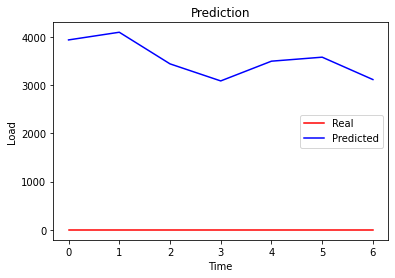

In [29]:
pr = 0

# Visualising the results
plt.plot(real_data[pr+k+1:pr+k+7+1, 1], color = 'red', label = 'Real')
plt.plot(predicted_data[pr], color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()

plt.show()

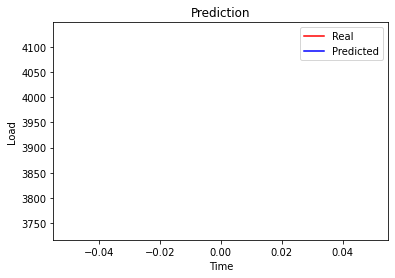

In [30]:
pr = 0

# Visualising the results
plt.plot(real_data[k+pr+1:len(real_data)-(7-pr), 1], color = 'red', label = 'Real')
plt.plot(predicted_data[:,pr], color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

In [32]:
#model.save('model.h5')